# Simulation testing
Testing embedding and fractal dimension code with colored noise and Lorentz attractor.

In [84]:
%load_ext autoreload
%autoreload 2
    
%matplotlib inline
import time
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sys.path.append('/Users/rdgao/Documents/code/research/SpaceRecon/')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')

import dynamical.nonlinear as nl
import dynamical.pypsr as psr

import cProfile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

def sim_lorenz(T, fs, init, args):
    t = np.arange(0,T,1/fs)
    f = odeint(lorenz, init, t, args)
    x, y, z = f.T
    return x,y,z

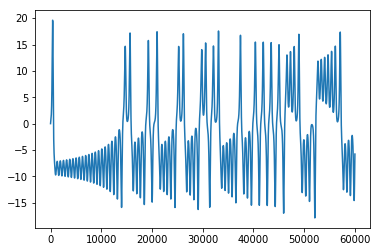

In [180]:
# Lorenz paramters and initial conditions
T,fs = 60,1000
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05
x,y,z = sim_lorenz(T,fs,init=(u0, v0, w0), args=(sigma, beta, rho))
plt.plot(x)

### Testing my code runtime speed

(157, 0.8851322990337012)


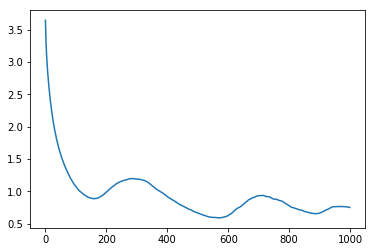

In [187]:
tMI, dMI = nl.delay_MI(x,50,1000)
print(nl.find_valley(dMI))
plt.plot(dMI)

In [188]:
begtime = time.time()
del_R0, attr_size0, nn_Rsq0, nn_idx0 = nl.nn_embed_dist(x,nl.find_valley(dMI)[0],5,'dist_point') # this is so fucking slow...
# so running this code on 120k samples literally take more than 15 minutes (still running), 
# and takes 7 seconds with pypsr lol
endtime = time.time()
endtime-begtime

2.9000000040468876e-05
0.00011599999993450183
Dim: 0
vectorize
1.9999999949504854e-06
compute distance and neighbors.
10.85935100000006
Dim: 1
vectorize
0.00024000000007617928
compute distance and neighbors.
72.55335499999978
Dim: 2
vectorize
0.001404999999977008
compute distance and neighbors.
80.79964800000016
Dim: 3
vectorize
0.0024819999998726416
compute distance and neighbors.
83.83685600000035
Dim: 4
vectorize
0.00327900000002046
compute distance and neighbors.
95.45777099999987
compute delR
0.15971600000011676


352.42091274261475

3
[0.99541959 0.02119296 0.         0.         0.        ]


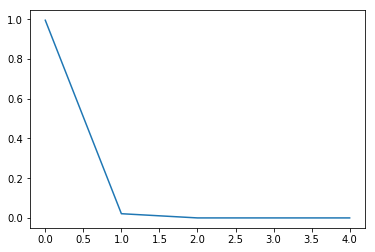

In [190]:
recon_dim, pffn = nl.nn_attractor_dim(del_R,attr_size)
plt.plot(pffn)
print(recon_dim) # but it gets the right answer!
print(pffn)

In [191]:
begtime = time.time()
del_R0, attr_size0, nn_Rsq0, nn_idx0 = nl.nn_embed_dist(x,nl.find_valley(dMI)[0],5,'sklearn') # this is so fucking slow...
# so running this code on 120k samples literally take more than 15 minutes (still running), 
# and takes 7 seconds with pypsr lol
endtime = time.time()
endtime-begtime

0.0006739999998899293
0.00035900000011679367
Dim: 0
vectorize
2.000000222324161e-06
compute distance and neighbors.
0.17770699999982753
Dim: 1
vectorize
0.00023099999998521525
compute distance and neighbors.
0.10673300000007657
Dim: 2
vectorize
0.0011230000000068685
compute distance and neighbors.
0.1347049999999399
Dim: 3
vectorize
0.0013009999997848354
compute distance and neighbors.
0.13852100000030987
Dim: 4
vectorize
0.001378000000386237
compute distance and neighbors.
0.16172899999992296
compute delR
0.15405600000030972


0.8774771690368652

3
[0.99939205 0.0539897  0.         0.         0.        ]


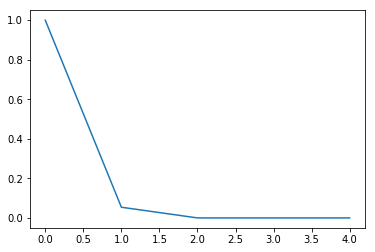

In [192]:
recon_dim0, pffn0 = nl.nn_attractor_dim(del_R0,attr_size0)
plt.plot(pffn0)
print(recon_dim0) # but it gets the right answer!
print(pffn0)

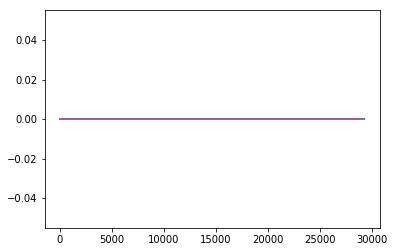

In [177]:
plt.plot(del_R-del_R0)

### testing PYPSR runtime speed

In [183]:
lags, ami = psr.lagged_ami(x,max_lag=1000,n_bins=50)

157

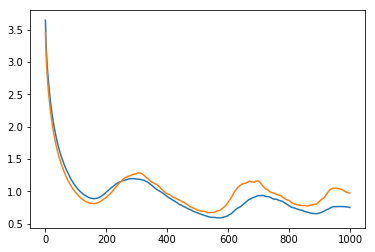

In [184]:
plt.plot(ami)
plt.plot(dMI) #these two methods are identical...because the code is identical.
nl.find_valley(ami)[0]

In [193]:
begtime = time.time()
p_dim, p_pffn = psr.global_false_nearest_neighbors(x,nl.find_valley(ami)[0], max_dims=5) 
#okay this is really fast, like, order of magnitude faster or more, and that's when my code is on "fast mode" with memory
endtime = time.time()
endtime-begtime

3.6224892139434814

[0.99943023 0.05379588 0.         0.         0.        ]


3

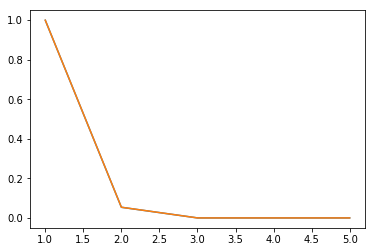

In [196]:
plt.plot(p_dim,p_pffn)
plt.plot(p_dim, pffn0)
#plt.plot(p_dim, pffn)
print(p_pffn)
np.where(p_pffn<=0.01)[0][0]+1